# 리뷰완료

이 자료는 위키독스 딥 러닝을 이용한 자연어 처리 입문의 소프트맥스 회귀 튜토리얼 자료입니다.  

링크 : https://wikidocs.net/35476

# Softmax(소프트맥스)

* Softmax(소프트맥스)는 입력받은 값을 출력으로 0~1사이의 값으로 모두 정규화  
* 출력 값들의 총합은 항상 1이 되는 특성을 가진 함수   
* 분류하고 싶은 클래수의 수 만큼 출력으로 구성  
* 가장 큰 출력 값을 부여받은 클래스가 확률이 가장 높은 것으로 이용

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# 1. 아이리스 품종 데이터에 대한 이해

In [2]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/06.%20Machine%20Learning/dataset/Iris.csv", filename="Iris.csv")

('Iris.csv', <http.client.HTTPMessage at 0x1f215f13be0>)

In [4]:
data = pd.read_csv('Iris.csv', encoding='latin1')

In [5]:
print('샘플의 개수 :', len(data))
print(data[:5])

샘플의 개수 : 150
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [6]:
# 중복을 허용하지 않고, 있는 데이터의 모든 종류를 출력
print("품종 종류:", data["Species"].unique(), sep="\n")

품종 종류:
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


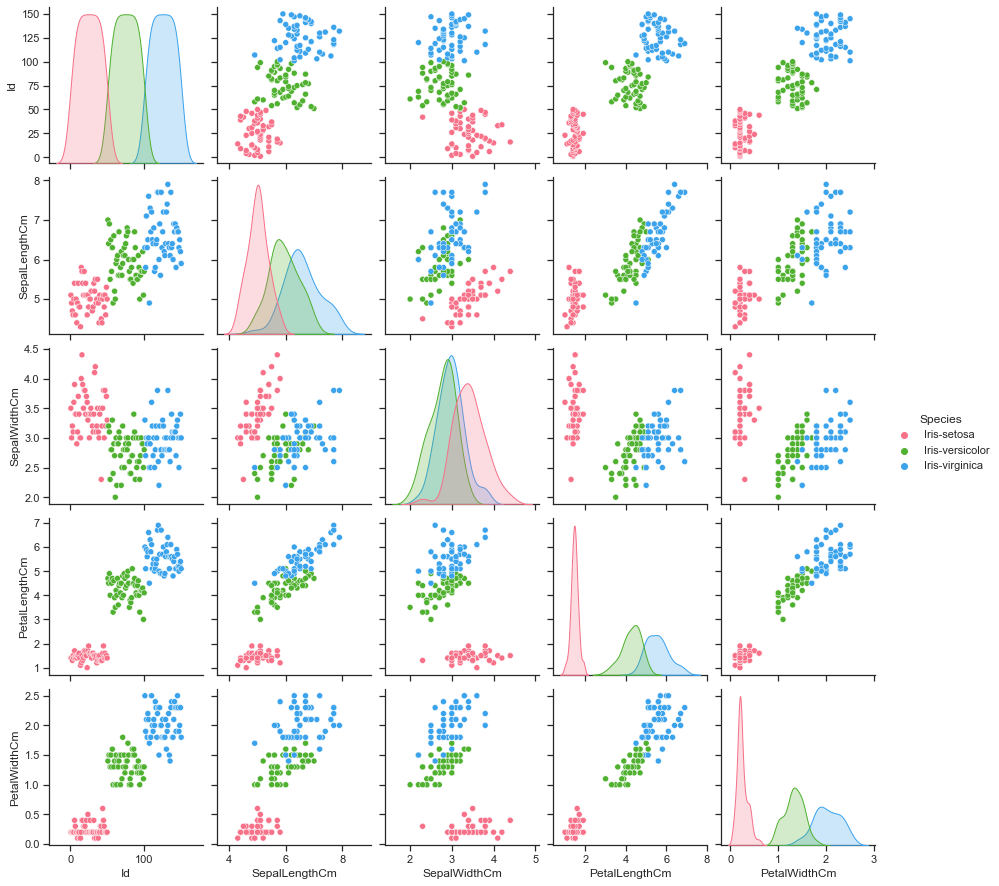

In [7]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data, hue="Species", palette="husl")

In [8]:
# 각 종과 특성에 대한 연관 관계
sns.barplot(data['Species'], data['SepalWidthCm'], ci=None)

TypeError: barplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

In [ ]:
data['Species'].value_counts().plot(kind='bar')

In [ ]:
# Iris-virginica는 0, Iris-setosa는 1, Iris-versicolor는 2가 됨.
data['Species'] = data['Species'].replace(['Iris-virginica','Iris-setosa','Iris-versicolor'],[0,1,2])
data['Species'].value_counts().plot(kind='bar')

In [ ]:
data_X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
data_y = data['Species'].values

print(data_X[:5])
print(data_y[:5])

In [ ]:
# 훈련 데이터와 테스트 데이터를 8:2로 나눕니다. 또한 데이터의 순서를 섞습니다.
(X_train, X_test, y_train, y_test) = train_test_split(data_X, data_y, train_size=0.8, random_state=1)

# 원-핫 인코딩
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train[:5])
print(y_test[:5])

# 2. 소프트맥스 회귀

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [ ]:
model = Sequential()
model.add(Dense(3, input_dim=4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

# 옵티마이저는 경사하강법의 일종인 adam을 사용합니다.
# 손실 함수(Loss function)는 크로스 엔트로피 함수를 사용합니다.
# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 200번 시도합니다.
history = model.fit(X_train, y_train, epochs=200, batch_size=1, validation_data=(X_test, y_test))

In [ ]:
epochs = range(1, len(history.history['accuracy']) + 1)

plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])

plt.title('model loss')

plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'val'], loc='upper left')

plt.show()

In [ ]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))